In [38]:
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import pandas as pd

In [39]:
df = pd.read_csv('C:\\Users\\hinaa\\Documents\\ML_Projects\\Icecream_sales_linear_regression\\Ice Cream.csv')
df

,Temperature,Revenue
0,24.6,535
1,26.1,626
2,27.8,661
3,20.6,488
4,11.6,317
...,...,...
495,22.3,525
496,32.9,756
497,12.6,307
498,22.4,567


In [40]:
df.isnull().sum()

Temperature    0
Revenue        0
dtype: int64

In [41]:
df.shape

(500, 2)

In [42]:
df.describe()

,Temperature,Revenue
count,500.000000,500.000000
mean,22.281600,522.058000
std,8.097597,175.410399
min,0.000000,10.000000
25%,17.175000,406.000000
50%,22.400000,530.000000
75%,27.800000,643.000000
max,45.000000,1000.000000


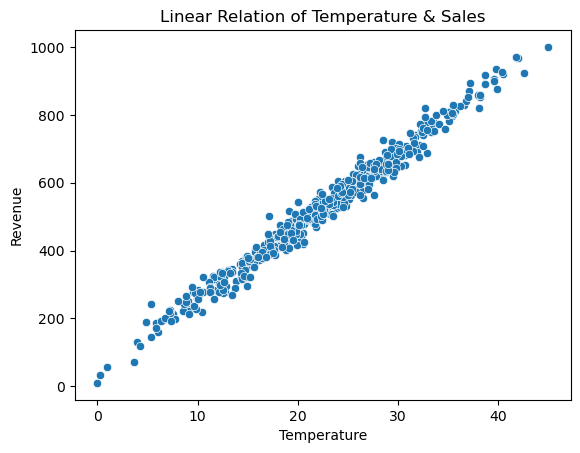

In [43]:
sns.scatterplot(data=df, x='Temperature', y='Revenue')
plt.title("Linear Relation of Temperature & Sales")
plt.show()

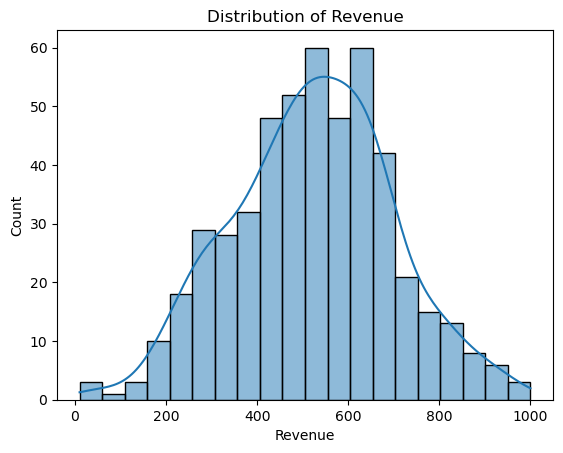

In [44]:
sns.histplot(df['Revenue'], bins=20, kde=True) #KDE is a non-parametric way to estimate the probability density function of a random variable
plt.title("Distribution of Revenue");
plt.show()

# Heatmap

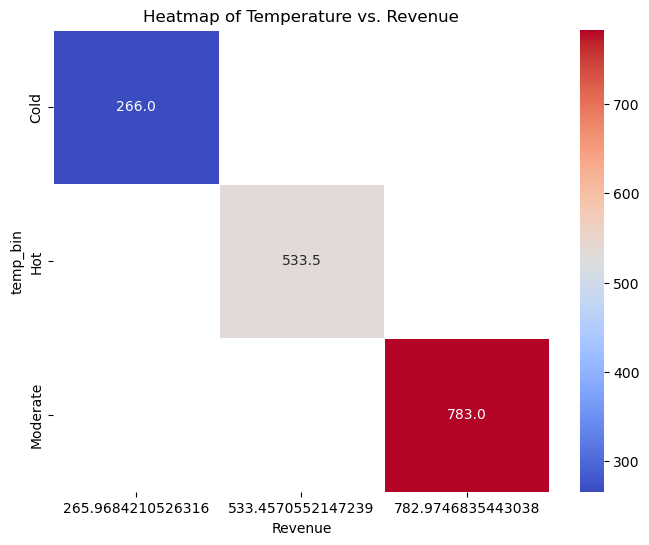

In [45]:
df['temp_bin']=pd.cut(df['Temperature'], bins=3, labels=['Cold', 'Hot','Moderate'])
heatmap_data=df.groupby('temp_bin')['Revenue'].mean().reset_index()
heatmap_data = heatmap_data.pivot(index='temp_bin', columns='Revenue', values='Revenue')
plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_data, annot=True, cmap='coolwarm', fmt=".1f", linewidths=.5)
plt.title('Heatmap of Temperature vs. Revenue')
plt.xlabel('Revenue')
plt.show()


In [46]:
X=df[['Temperature']]
y=df['Revenue']

In [47]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y, random_state=2529)


In [48]:
print("The shape of X_train :",X_train.shape)
print("The shape ofX_test :",X_test.shape)
print("The shape of y_train :",y_train.shape)
print("The shape of y_test :",y_test.shape)

The shape of X_train : (375, 1)
The shape ofX_test : (125, 1)
The shape of y_train : (375,)
The shape of y_test : (125,)


# Model Training

In [49]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()#This line creates an instance of the LinearRegression class and assigns it to the variable lr.
lr.fit(X_train, y_train)
# Now that the model is fitted, you can make predictions on your test data
y_predict = lr.predict(X_test)

In [51]:
data = pd.DataFrame({'Predicted': y_predict, 'Actual': y_test})

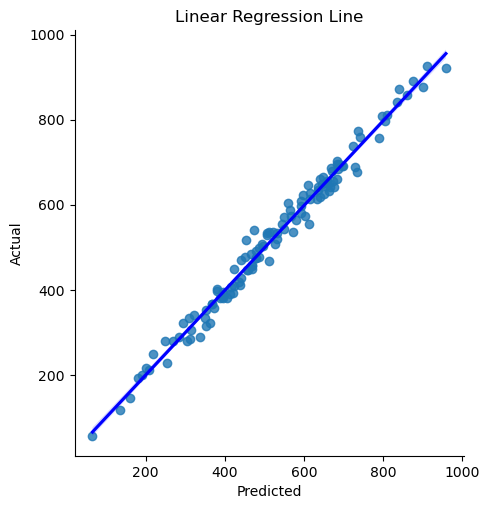

In [52]:
sns.lmplot(x='Predicted', y='Actual', data=data, line_kws={'color': 'blue'}, palette='Set1')
plt.title("Linear Regression Line")
plt.show();

# Model Accuracy

In [54]:
from sklearn.metrics import mean_absolute_percentage_error
error = mean_absolute_percentage_error(y_predict,y_test)
print("Accuracy of Linear Regression is : %.2f"%((1 - error)*100),'%')

Accuracy of Linear Regression is : 95.89 %
